# Welcome to Colab!

In [49]:
!pip -q install opencv-python matplotlib

# Clone the repo
!rm -rf Face-Detection-OpenCV
!git clone https://github.com/informramiz/Face-Detection-OpenCV.git

import os
REPO_DIR = "Face-Detection-OpenCV"
DATA_DIR = os.path.join(REPO_DIR, "data")
print("Repo files:", os.listdir(REPO_DIR)[:10])
print("Data files:", os.listdir(DATA_DIR)[:10])


Cloning into 'Face-Detection-OpenCV'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 91 (delta 2), reused 6 (delta 2), pack-reused 84 (from 1)
Receiving objects: 100% (91/91), 28.16 MiB | 40.04 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Repo files: ['Face-Detection.py', 'Face-Detection.ipynb', 'docs-images', '.git', 'output', '.gitignore', 'Face-Detection.html', 'submission', 'LICENSE', 'data']
Data files: ['test5.jpg', 'test3.jpg', 'lbpcascade_frontalface.xml', 'test6.jpg', 'test2.jpg', 'test1.jpg', 'haarcascade_frontalface_alt.xml', 'test4.jpg']


In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

def bgr_to_rgb(img_bgr):
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def detect_faces(cascade, img_bgr, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30)):
    """
    Detect faces using OpenCV CascadeClassifier and draw rectangles.
    Returns: (output_image_bgr, faces_rectangles)
    """
    out = img_bgr.copy()
    gray = cv2.cvtColor(out, cv2.COLOR_BGR2GRAY)

    faces = cascade.detectMultiScale(
        gray,
        scaleFactor=scaleFactor,
        minNeighbors=minNeighbors,
        minSize=minSize
    )

    for (x, y, w, h) in faces:
        cv2.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return out, faces

def show_image(title, img_bgr, figsize=(8,6)):
    plt.figure(figsize=figsize)
    plt.imshow(bgr_to_rgb(img_bgr))
    plt.title(title)
    plt.axis("off")
    plt.show()


In [51]:
haar_path = os.path.join(DATA_DIR, "haarcascade_frontalface_alt.xml")
lbp_path  = os.path.join(DATA_DIR, "lbpcascade_frontalface.xml")

haar_face_cascade = cv2.CascadeClassifier(haar_path)
lbp_face_cascade  = cv2.CascadeClassifier(lbp_path)

print("Haar loaded OK?", not haar_face_cascade.empty())
print("LBP loaded OK? ", not lbp_face_cascade.empty())


Haar loaded OK? True
LBP loaded OK?  True


Found test images: ['Face-Detection-OpenCV/data/test1.jpg', 'Face-Detection-OpenCV/data/test2.jpg', 'Face-Detection-OpenCV/data/test3.jpg', 'Face-Detection-OpenCV/data/test4.jpg', 'Face-Detection-OpenCV/data/test5.jpg', 'Face-Detection-OpenCV/data/test6.jpg']

Image: test1.jpg
  Haar faces: 1  | LBP faces: 0


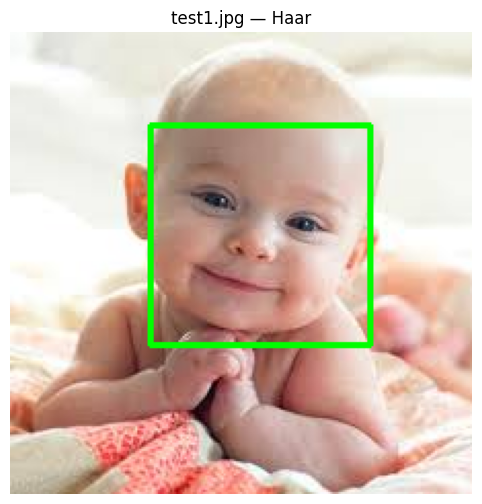

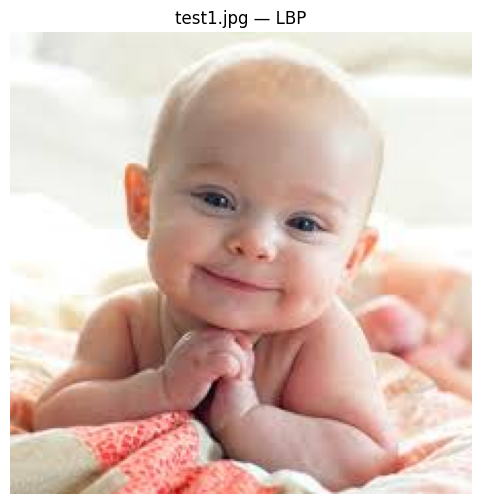


Image: test2.jpg
  Haar faces: 1  | LBP faces: 1


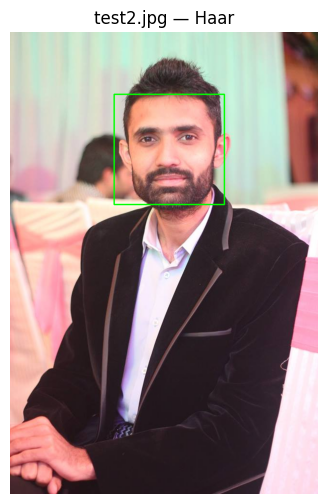

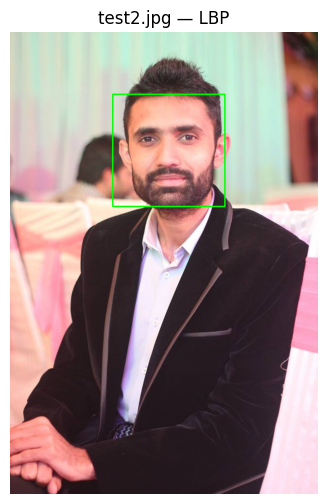


Image: test3.jpg
  Haar faces: 3  | LBP faces: 3


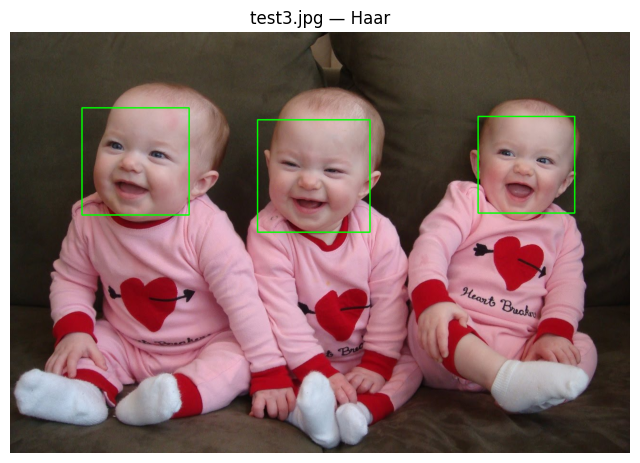

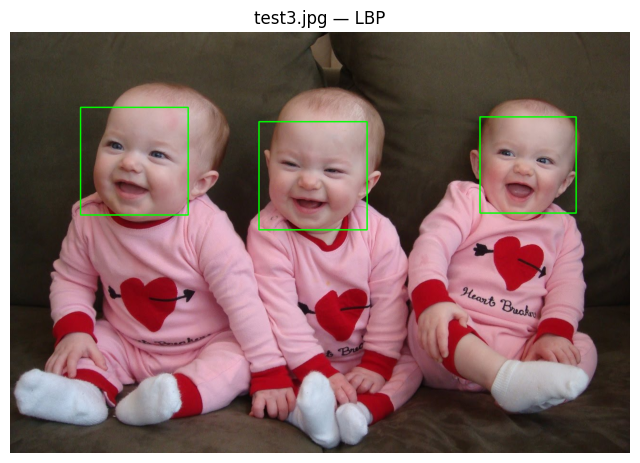


Image: test4.jpg
  Haar faces: 7  | LBP faces: 7


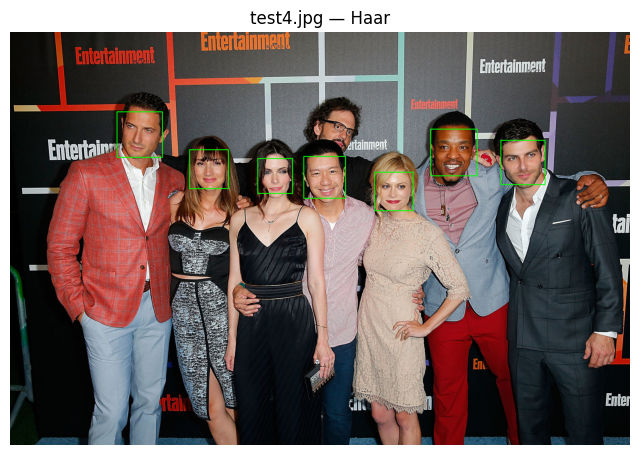

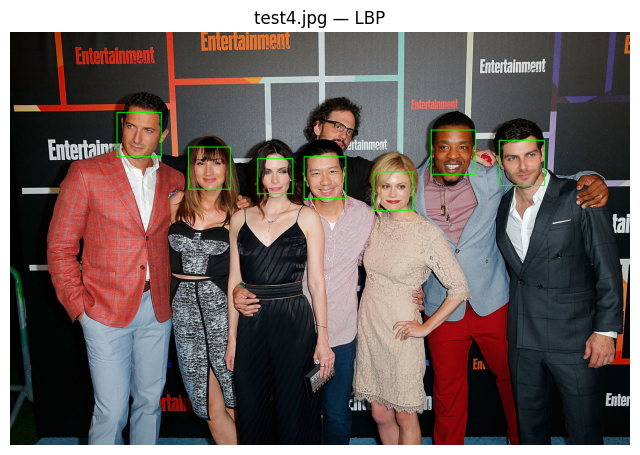


Image: test5.jpg
  Haar faces: 8  | LBP faces: 8


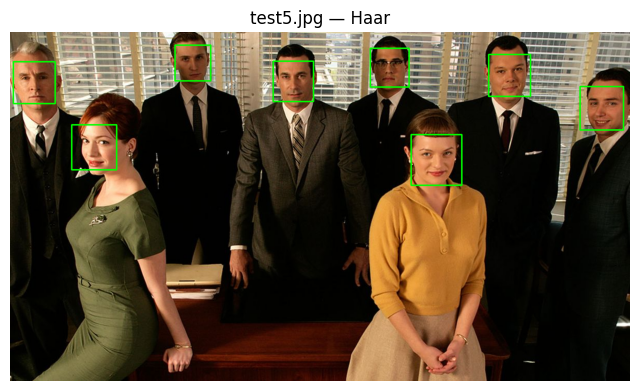

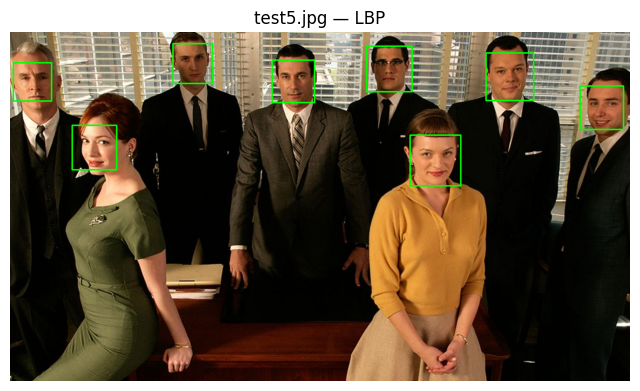


Image: test6.jpg
  Haar faces: 7  | LBP faces: 6


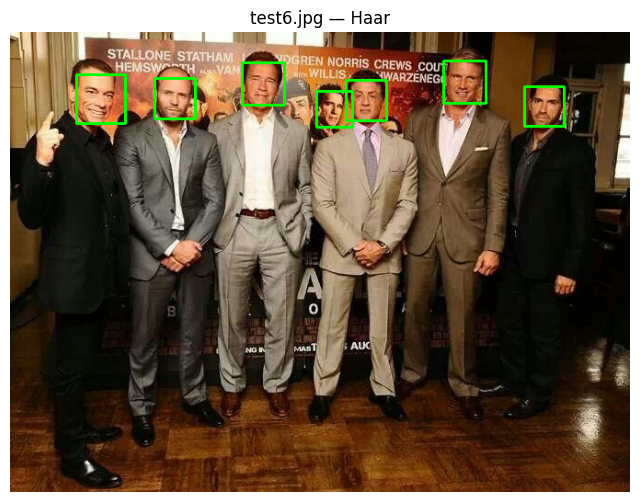

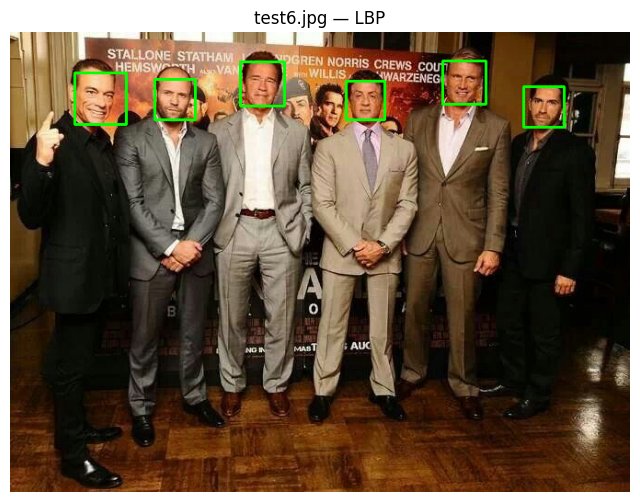

In [52]:
test_images = sorted(glob.glob(os.path.join(DATA_DIR, "test*.jpg")))
print("Found test images:", test_images)

for img_path in test_images:
    img = cv2.imread(img_path)
    if img is None:
        print("Could not read:", img_path)
        continue

    out_haar, faces_haar = detect_faces(haar_face_cascade, img, scaleFactor=1.1, minNeighbors=5)
    out_lbp,  faces_lbp  = detect_faces(lbp_face_cascade,  img, scaleFactor=1.1, minNeighbors=5)

    print(f"\nImage: {os.path.basename(img_path)}")
    print("  Haar faces:", len(faces_haar), " | LBP faces:", len(faces_lbp))

    show_image(f"{os.path.basename(img_path)} — Haar", out_haar)
    show_image(f"{os.path.basename(img_path)} — LBP", out_lbp)


Saving four-different-emotions-same-bearded-260nw-329282135.webp to four-different-emotions-same-bearded-260nw-329282135 (3).webp
Haar faces: 4
LBP faces : 4


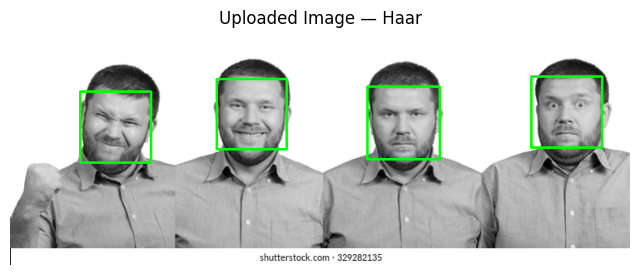

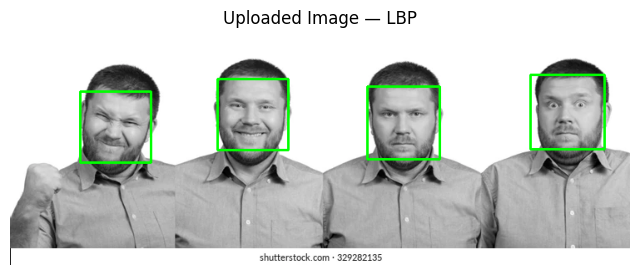

In [53]:
from google.colab import files

uploaded = files.upload()
uploaded_name = list(uploaded.keys())[0]

img = cv2.imread(uploaded_name)
if img is None:
    raise ValueError("Could not read uploaded image. Try uploading a JPG/PNG file.")

out_haar, faces_haar = detect_faces(haar_face_cascade, img, scaleFactor=1.1, minNeighbors=5)
out_lbp,  faces_lbp  = detect_faces(lbp_face_cascade,  img, scaleFactor=1.1, minNeighbors=5)

print("Haar faces:", len(faces_haar))
print("LBP faces :", len(faces_lbp))

show_image("Uploaded Image — Haar", out_haar)
show_image("Uploaded Image — LBP", out_lbp)


In [20]:
os.makedirs("outputs", exist_ok=True)

cv2.imwrite("outputs/result_haar.jpg", out_haar)
cv2.imwrite("outputs/result_lbp.jpg", out_lbp)

print("Saved:")
print(" - outputs/result_haar.jpg")
print(" - outputs/result_lbp.jpg")

files.download("outputs/result_haar.jpg")
files.download("outputs/result_lbp.jpg")


Saved:
 - outputs/result_haar.jpg
 - outputs/result_lbp.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>